In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#load data

In [4]:
daily_df = pd.read_csv("dataset/stations_daily.csv")

In [5]:
hourly_df = pd.read_csv("dataset/stations_hourly.csv")

In [6]:
rsinaica_df = pd.read_csv("dataset/stations_rsinaica.csv")

# จัดการกับข้อมูลรายงานฝุ่นรายวันก่อน

we will use this dataframe to calculate the yearly statistic of ฝุ่น

In [7]:
daily_df.head()

,datetime,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,...,HCT,HRI,IUV,PB,PP,PST,RS,TMPI,UVA,XIL
0,2015-04-02,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.361000,NaN,NaN
1,2015-05-21,32,0.454967,0.347400,0.059194,0.029176,NaN,44.879091,0.029525,0.053121,...,NaN,NaN,NaN,570.775455,0.296364,NaN,7.871636,16.792818,NaN,NaN
2,2015-05-22,32,0.077821,0.389323,0.019158,0.051903,NaN,42.506000,0.009589,0.014215,...,NaN,NaN,NaN,558.360000,0.002750,NaN,384.788079,17.018949,NaN,NaN
3,2015-05-23,32,0.018036,0.387729,0.019711,0.021092,0.144603,54.734437,0.009863,0.013436,...,NaN,NaN,NaN,573.282187,0.038750,NaN,252.605975,18.575000,NaN,NaN
4,2015-05-24,32,0.024935,0.398042,0.024757,0.009568,0.494143,58.374574,0.012397,0.010337,...,NaN,NaN,NaN,572.169574,0.003404,NaN,259.231664,16.781064,NaN,NaN


Let's add year and month columns to daily_df 

In [8]:
daily_df.insert(1, "year", daily_df["datetime"].apply(lambda x: x.split("-")[0]))
daily_df.insert(1, "month", daily_df["datetime"].apply(lambda x: x.split("-")[1]))

convert month and year to int \
then sort values by month and year

In [9]:
daily_df["month"] = pd.to_numeric(daily_df["month"])
daily_df["year"] = pd.to_numeric(daily_df["year"])

daily_df.sort_values(by=["year", "month"], inplace = True)
daily_df.head()

,datetime,month,year,station_id,PM2.5,PM10,NOx,O3,CO,HR,...,HCT,HRI,IUV,PB,PP,PST,RS,TMPI,UVA,XIL
59820,2000-01-01,1,2000,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59821,2000-01-02,1,2000,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59822,2000-01-03,1,2000,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59823,2000-01-04,1,2000,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59824,2000-01-05,1,2000,102,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


count the values exist each year

In [10]:
groupDaily_by_year = daily_df.groupby("year")
groupDaily_by_year.count()

,datetime,month,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,...,HCT,HRI,IUV,PB,PP,PST,RS,TMPI,UVA,XIL
year,,,,,,,,,,,,,,,,,,,,,
2000,1678,1678,1678,0,0,0,0,0,0,1678,...,0,0,0,0,0,0,0,0,0,0
2001,1658,1658,1658,0,0,0,0,0,0,1658,...,0,0,0,0,0,0,0,0,0,0
2002,826,826,826,0,0,0,0,0,0,826,...,0,0,0,0,0,0,0,0,0,0
2006,321,321,321,0,0,0,0,0,0,321,...,0,0,0,0,0,0,0,0,0,0
2007,44,44,44,0,0,0,0,0,0,44,...,0,0,0,0,0,0,0,0,0,0
2008,43,43,43,0,0,0,0,0,0,43,...,0,0,0,0,0,0,0,0,0,0
2009,43,43,43,0,0,0,0,0,0,43,...,0,0,0,0,0,0,0,0,0,0
2010,10417,10417,10417,3814,7612,151,8235,6816,151,1069,...,0,0,0,140,0,0,0,0,0,0
2011,11315,11315,11315,5374,8473,61,10057,6298,65,1836,...,0,29,0,36,27,0,0,25,0,0


In [11]:
# we will keep a year if PM2.5 have data > 30 %
def keep_year(group):
    return ((group.count()["PM2.5"] * 100) / group.count()["datetime"] > 50)
daily_df = groupDaily_by_year.filter(keep_year)

filter data

In [12]:
daily_df = groupDaily_by_year.filter(keep_year)
daily_df["year"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

next we will drop column which have few data

In [13]:
daily_df.isna().sum()* 100 / len(daily_df)

#show % of Nan values in each column, we will drop at 51 %

datetime        0.000000
month           0.000000
year            0.000000
station_id      0.000000
PM2.5          23.970884
PM10           19.419134
NOx            41.364588
O3             15.611430
CO             20.965542
HR             35.960491
NO             43.242666
NO2            24.668069
TMP            34.016287
BEN            99.596476
CH4            99.859417
CN             99.690198
CO2            99.970842
H2S            99.854211
HCNM           99.854731
HCT           100.000000
HRI            94.701601
IUV            97.430464
PB             52.365431
PP             60.863385
PST           100.000000
RS             60.719678
TMPI           82.110092
UVA            91.752491
XIL            99.596476
dtype: float64

Too many Nan values OMG

In [14]:
for col in daily_df:
    if daily_df[col].isna().sum()* 100 / len(daily_df) > 51:
        daily_df.drop(col, axis=1,inplace=True)

daily_df.reset_index(drop = True)

,datetime,month,year,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,TMP
0,2013-01-01,1,2013,68,37.084448,79.583333,NaN,0.014000,0.418750,NaN,NaN,NaN,NaN
1,2013-01-02,1,2013,68,16.040586,61.333333,NaN,0.011917,0.383750,NaN,NaN,NaN,NaN
2,2013-01-03,1,2013,68,11.880552,57.739130,NaN,0.015958,0.364583,NaN,NaN,NaN,NaN
3,2013-01-04,1,2013,68,13.000137,55.375000,NaN,0.013208,0.420833,NaN,NaN,NaN,NaN
4,2013-01-05,1,2013,68,18.025929,72.625000,NaN,0.012542,0.431667,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192053,2021-12-27,12,2021,426,28.956522,67.375000,0.036429,0.030750,1.684583,56.541667,NaN,0.024762,21.660833
192054,2021-12-28,12,2021,426,20.818182,55.833333,0.037508,0.026792,1.700000,44.375000,NaN,0.023225,23.731250
192055,2021-12-29,12,2021,426,16.857143,51.458333,0.045588,0.017083,1.732917,37.875000,NaN,0.026500,22.751250
192056,2021-12-30,12,2021,426,21.555556,51.750000,0.037229,0.029833,1.520000,42.916667,NaN,0.023929,22.988333


In [15]:
group_by_y = daily_df.set_index("year").groupby("year")
group_by_y["PM2.5"].mean()

year
2013    2.870717e+01
2014    2.646882e+01
2015    3.329578e+01
2016    5.457275e+01
2017    5.492572e+01
2018    4.002737e+01
2019    2.884864e+01
2020    1.788649e+34
2021    4.701081e+02
Name: PM2.5, dtype: float64

In [16]:
# something wrong with 2020
twenty_sort = daily_df[daily_df["year"]==2020].sort_values("PM2.5",ascending=False)
#we can agree that row 1, 2, 3 is an outlier
twenty_sort.head()

,datetime,month,year,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,TMP
9366,2020-07-13,7,2020,59,1.806160e+38,1.412893e+38,NaN,0.010338,0.981094,72771.476818,NaN,NaN,83890.660955
9365,2020-07-12,7,2020,59,1.000740e+38,4.905567e+37,NaN,NaN,0.261321,175143.866667,NaN,NaN,202409.533333
9364,2020-07-11,7,2020,59,7.927562e+37,4.558188e+37,NaN,NaN,0.964935,8925.452105,NaN,NaN,34847.181421
98697,2020-10-14,10,2020,134,1.000092e+03,2.144815e+01,NaN,0.022022,0.184360,58.912799,NaN,0.008879,22.014575
98726,2020-11-12,11,2020,134,1.000077e+03,4.880327e+01,NaN,0.038890,0.313007,45.981627,NaN,0.012959,23.412954


In [17]:
daily_df.drop([9366, 9365, 9364], inplace=True)

fillna

In [37]:
# for y in daily_df["year"].unique():
#     for m in daily_df["month"].unique():
#         daily_df.update(daily_df.loc[(daily_df["year"]==y) & (daily_df["month"]==m),"PM2.5"].fillna(add_PM2_5[y][m]["mean"]))
#         daily_df.update(daily_df.loc[(daily_df["year"]==y) & (daily_df["month"]==m),"PM10"].fillna(add_PM10[y][m]["mean"]))

daily_df=daily_df.fillna(method="ffill")

In [41]:
daily_df.groupby("year")["PM2.5"].mean()

year
2013     26.743850
2014     35.123046
2015     42.716038
2016     51.872305
2017     49.289124
2018     37.268209
2019     29.596854
2020     28.784027
2021    408.401149
Name: PM2.5, dtype: float64

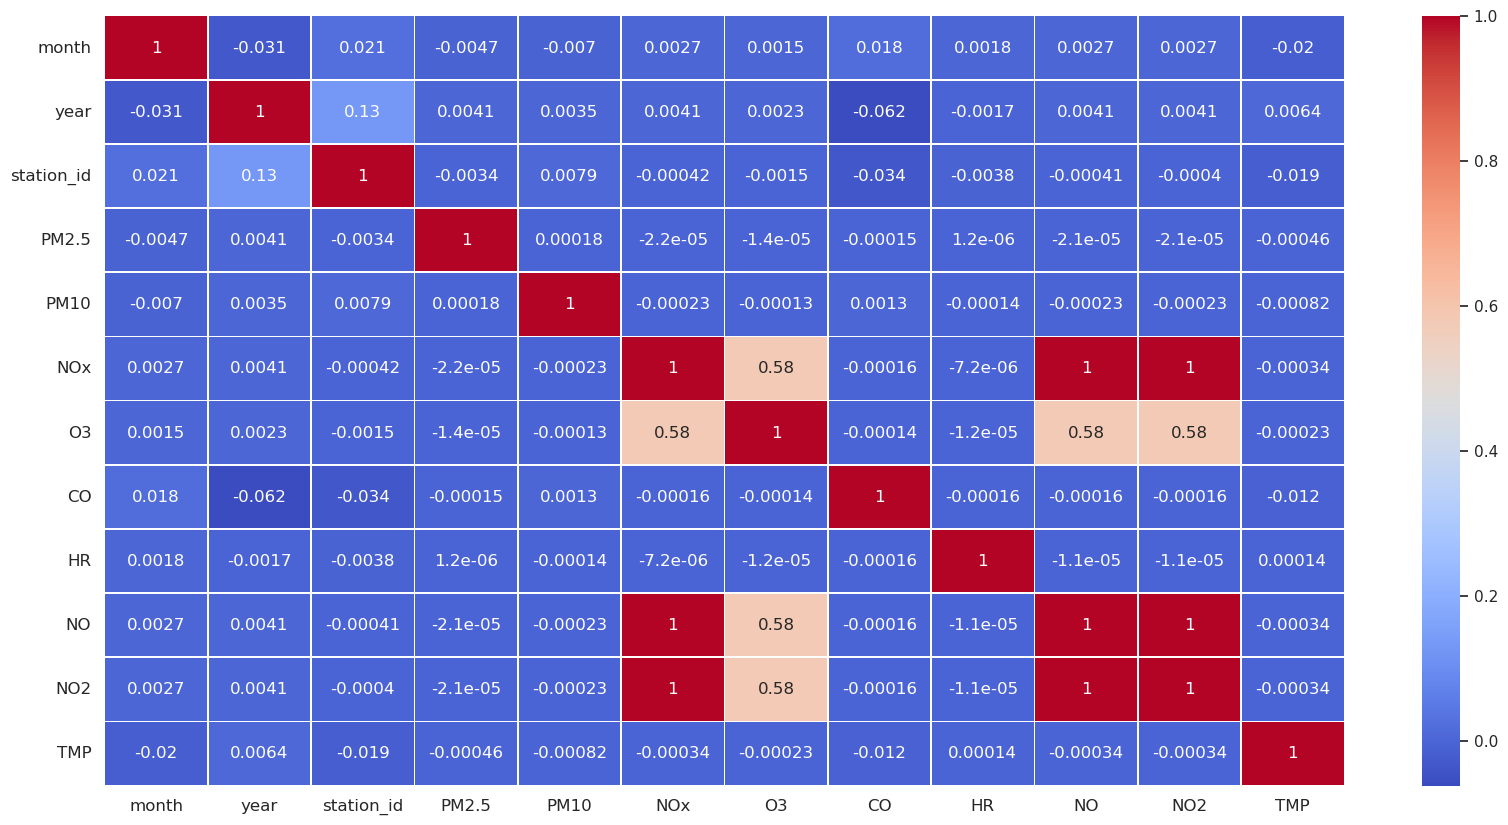

In [51]:
data_to_corr = daily_df[daily_df["year"]>=2013].iloc[:,1:]
plt.gcf().set_size_inches(20, 10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.set(font_scale=1)
dataplot = sns.heatmap(data_to_corr.corr(), cmap="coolwarm", annot = True, linewidths=.5)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

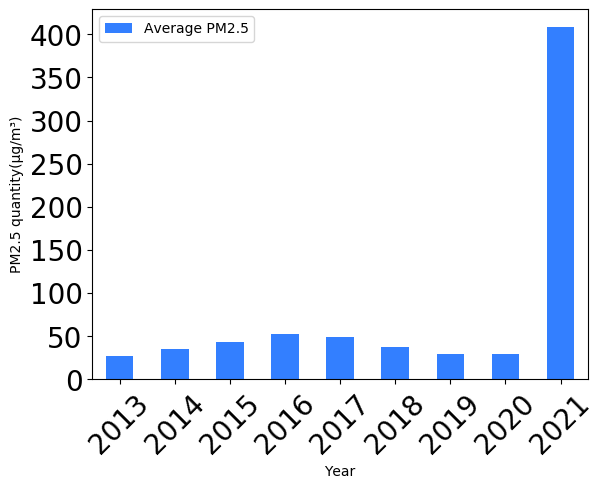

In [22]:
p1_df = pd.DataFrame({"Average PM2.5": daily_df.groupby("year")["PM2.5"].mean()}).reset_index()
p1_df
p1_df.plot("year", "Average PM2.5", kind='bar', color="#337fff", width=0.5);
plt.xlabel('Year')
plt.ylabel('PM2.5 quantity(µg/m³)')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend()
plt.xticks(rotation = 45)

In [ ]:
daily_df

# hourly_df

In [ ]:
hourly_df.head()

In [ ]:
# for y in daily_df["year"].unique()[3:]:
#     value = (mean_y[y])
#     print(y)
#     (daily_df[daily_df["year"]==y]["PM2.5"].fillna(value, inplace = True))


In [ ]:
daily_df[daily_df["year"] == 2010]["PM10"]

# rsinaica_df

In [ ]:
hourly_df.drop_duplicates(["datetime", "station_id"])
hourly_df.sort_values("datetime")

In [ ]:
rsinaica_df.info()

make new dataframe caontain station_id and network_name(city)

In [ ]:
data = {"station_id":rsinaica_df["station_id"],
        "network_name":rsinaica_df["network_name"]}
new_df = pd.DataFrame(data)

In [ ]:
new_df.fillna("Unknown")

#  prepare data for คำนวณ อับดับเมือง
merge new_df and daily_df

In [ ]:
daily_station = pd.merge(daily_df, new_df,on="station_id")

In [ ]:
daily_station.sort_values(by=["year", "month"], inplace = True)

In [ ]:
daily_station[daily_station["station_id"]==59]